# Heart Data EDA and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data set

In [2]:
heart_data = pd.read_csv("heart_EDA.csv")
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1.0,3,145.0,233.0,1.0,0,150,0,2.3,0,0.0,1,1
1,37,1.0,2,130.0,250.0,0.0,1,187,0,3.5,0,0.0,2,1
2,41,0.0,1,130.0,204.0,0.0,0,172,0,1.4,2,0.0,2,1
3,56,1.0,1,120.0,236.0,NaN,1,178,0,0.8,2,0.0,2,1
4,57,0.0,0,120.0,NaN,0.0,1,163,1,0.6,2,0.0,2,1


## Variable information

age (Age in years)

sex : (1 = male, 0 = female)

cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina]

trestbps (Resting Blood Pressure in mm/hg )

chol (Serum Cholesterol in mg/dl)

fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]

restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]

thalach (maximum heart rate achieved)

exang (Exercise Induced Angina): [1 = yes, 0 = no]

oldpeak (ST depression induced by exercise relative to rest)

slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]

ca [number of major vessels (0–3)

thall : [1 = normal, 2 = fixed defect, 3 = reversible defect]

target: [0 = disease, 1 = no disease]

# Checking for Null and filling them

In [3]:
heart_data.isnull().sum()

age          0
sex         18
cp           0
trtbps      17
chol        23
fbs         20
restecg      0
thalachh     0
exng         0
oldpeak      0
slp          0
caa         12
thall        0
output       0
dtype: int64

In [4]:
heart_data.sex.fillna(heart_data['sex'].median(), inplace= True)
heart_data.trtbps.fillna(heart_data['trtbps'].median(), inplace= True)
heart_data.chol.fillna(heart_data['chol'].median(), inplace= True)
heart_data.fbs.fillna(heart_data['fbs'].median(), inplace= True)
heart_data.caa.fillna(heart_data['caa'].median(), inplace= True)

In [5]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Univariate Analysis

First we need to seprate Numeric and Categarical variables

Numeric - age,trtbps,chol,fbs,thalachh,oldpeak

Categarical - sex,cp,restecg,exng,slp,caa,thall,output

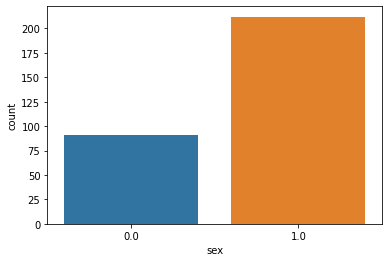

In [6]:
sns.countplot(x= "sex", data= heart_data)
plt.show()

We can see from count plot that males are 2 times likely to have this test than females.

Like This we can conclude for other categerical variables also.

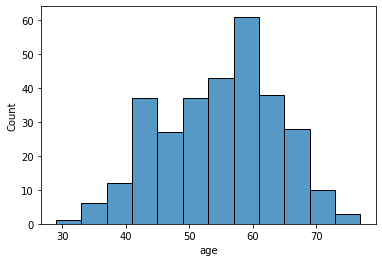

In [7]:
sns.histplot(heart_data["age"])
plt.show()

From histrogram of age we can see that age in normally distributed. 
Like This we find distribution of other Numeric variable also/too.

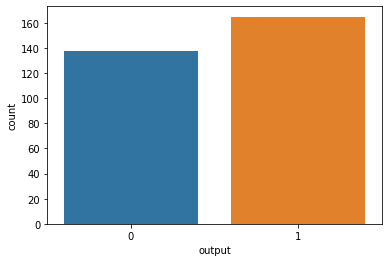

In [8]:
sns.countplot(x= "output", data= heart_data)
plt.show()

There is equal representation of both outputs.Which is expected from the data.

# Bivariate Analysis

## age and output

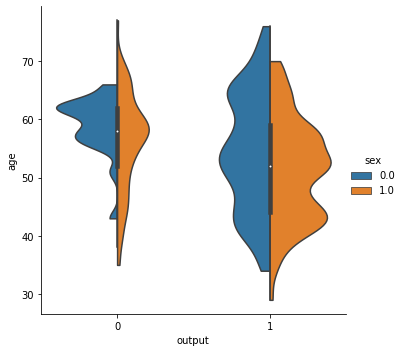

In [9]:
sns.catplot(data=heart_data, x="output", y="age", hue="sex", kind="violin", bw=.25, cut=0, split=True,)
plt.show()

## blood presure and output

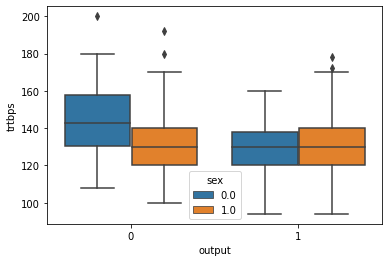

In [10]:
sns.boxplot(x=heart_data['output'],y=heart_data['trtbps'], hue=heart_data['sex'],data=heart_data)
plt.show()

## heart rate and output

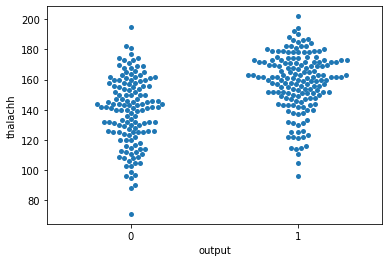

In [11]:
sns.swarmplot(x='output',y='thalachh',data= heart_data)
plt.show()

## cholestrol and output

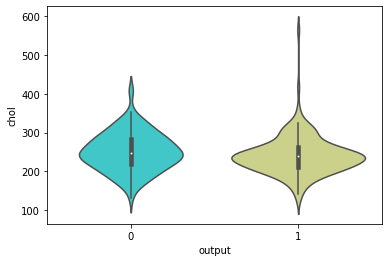

In [12]:
sns.violinplot(x="output", y="chol", data= heart_data, palette='rainbow')
plt.show()

# Resting ECG and Output

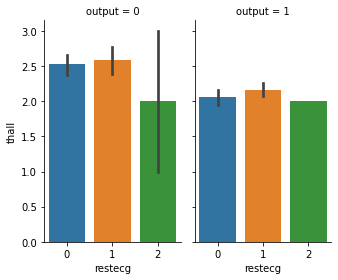

In [13]:
sns.catplot(data=heart_data, x="restecg", y="thall", col="output", kind="bar", height=4, aspect=.6)
plt.show()

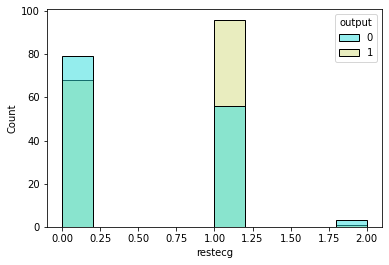

In [14]:
sns.histplot(x='restecg', hue='output', data= heart_data, palette='rainbow')
plt.show()

# thall(stage of disease) and Output

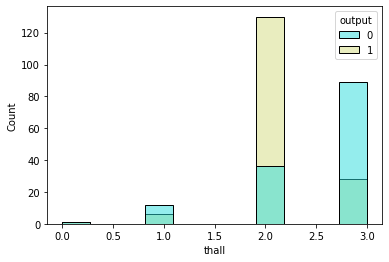

In [15]:
sns.histplot(x='thall', hue='output', data= heart_data, palette='rainbow')
plt.show()

# exang (Exercise Induced Angina) vs Output

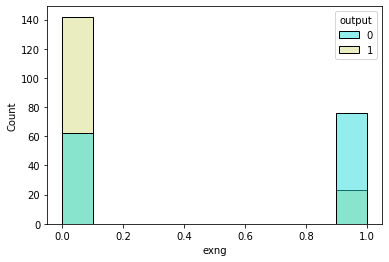

In [16]:
sns.histplot(x='exng', hue='output', data= heart_data, palette='rainbow')
plt.show()

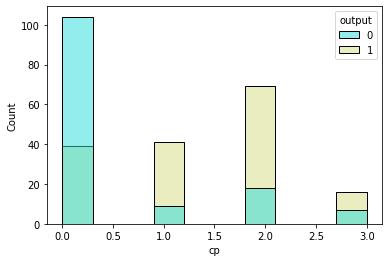

In [17]:
sns.histplot(x='cp', hue='output', data= heart_data, palette='rainbow')
plt.show()

# Bivariate Analysis

# Scatter plot matrix (diagonal elements are histrogram)

<Figure size 2520x2520 with 0 Axes>

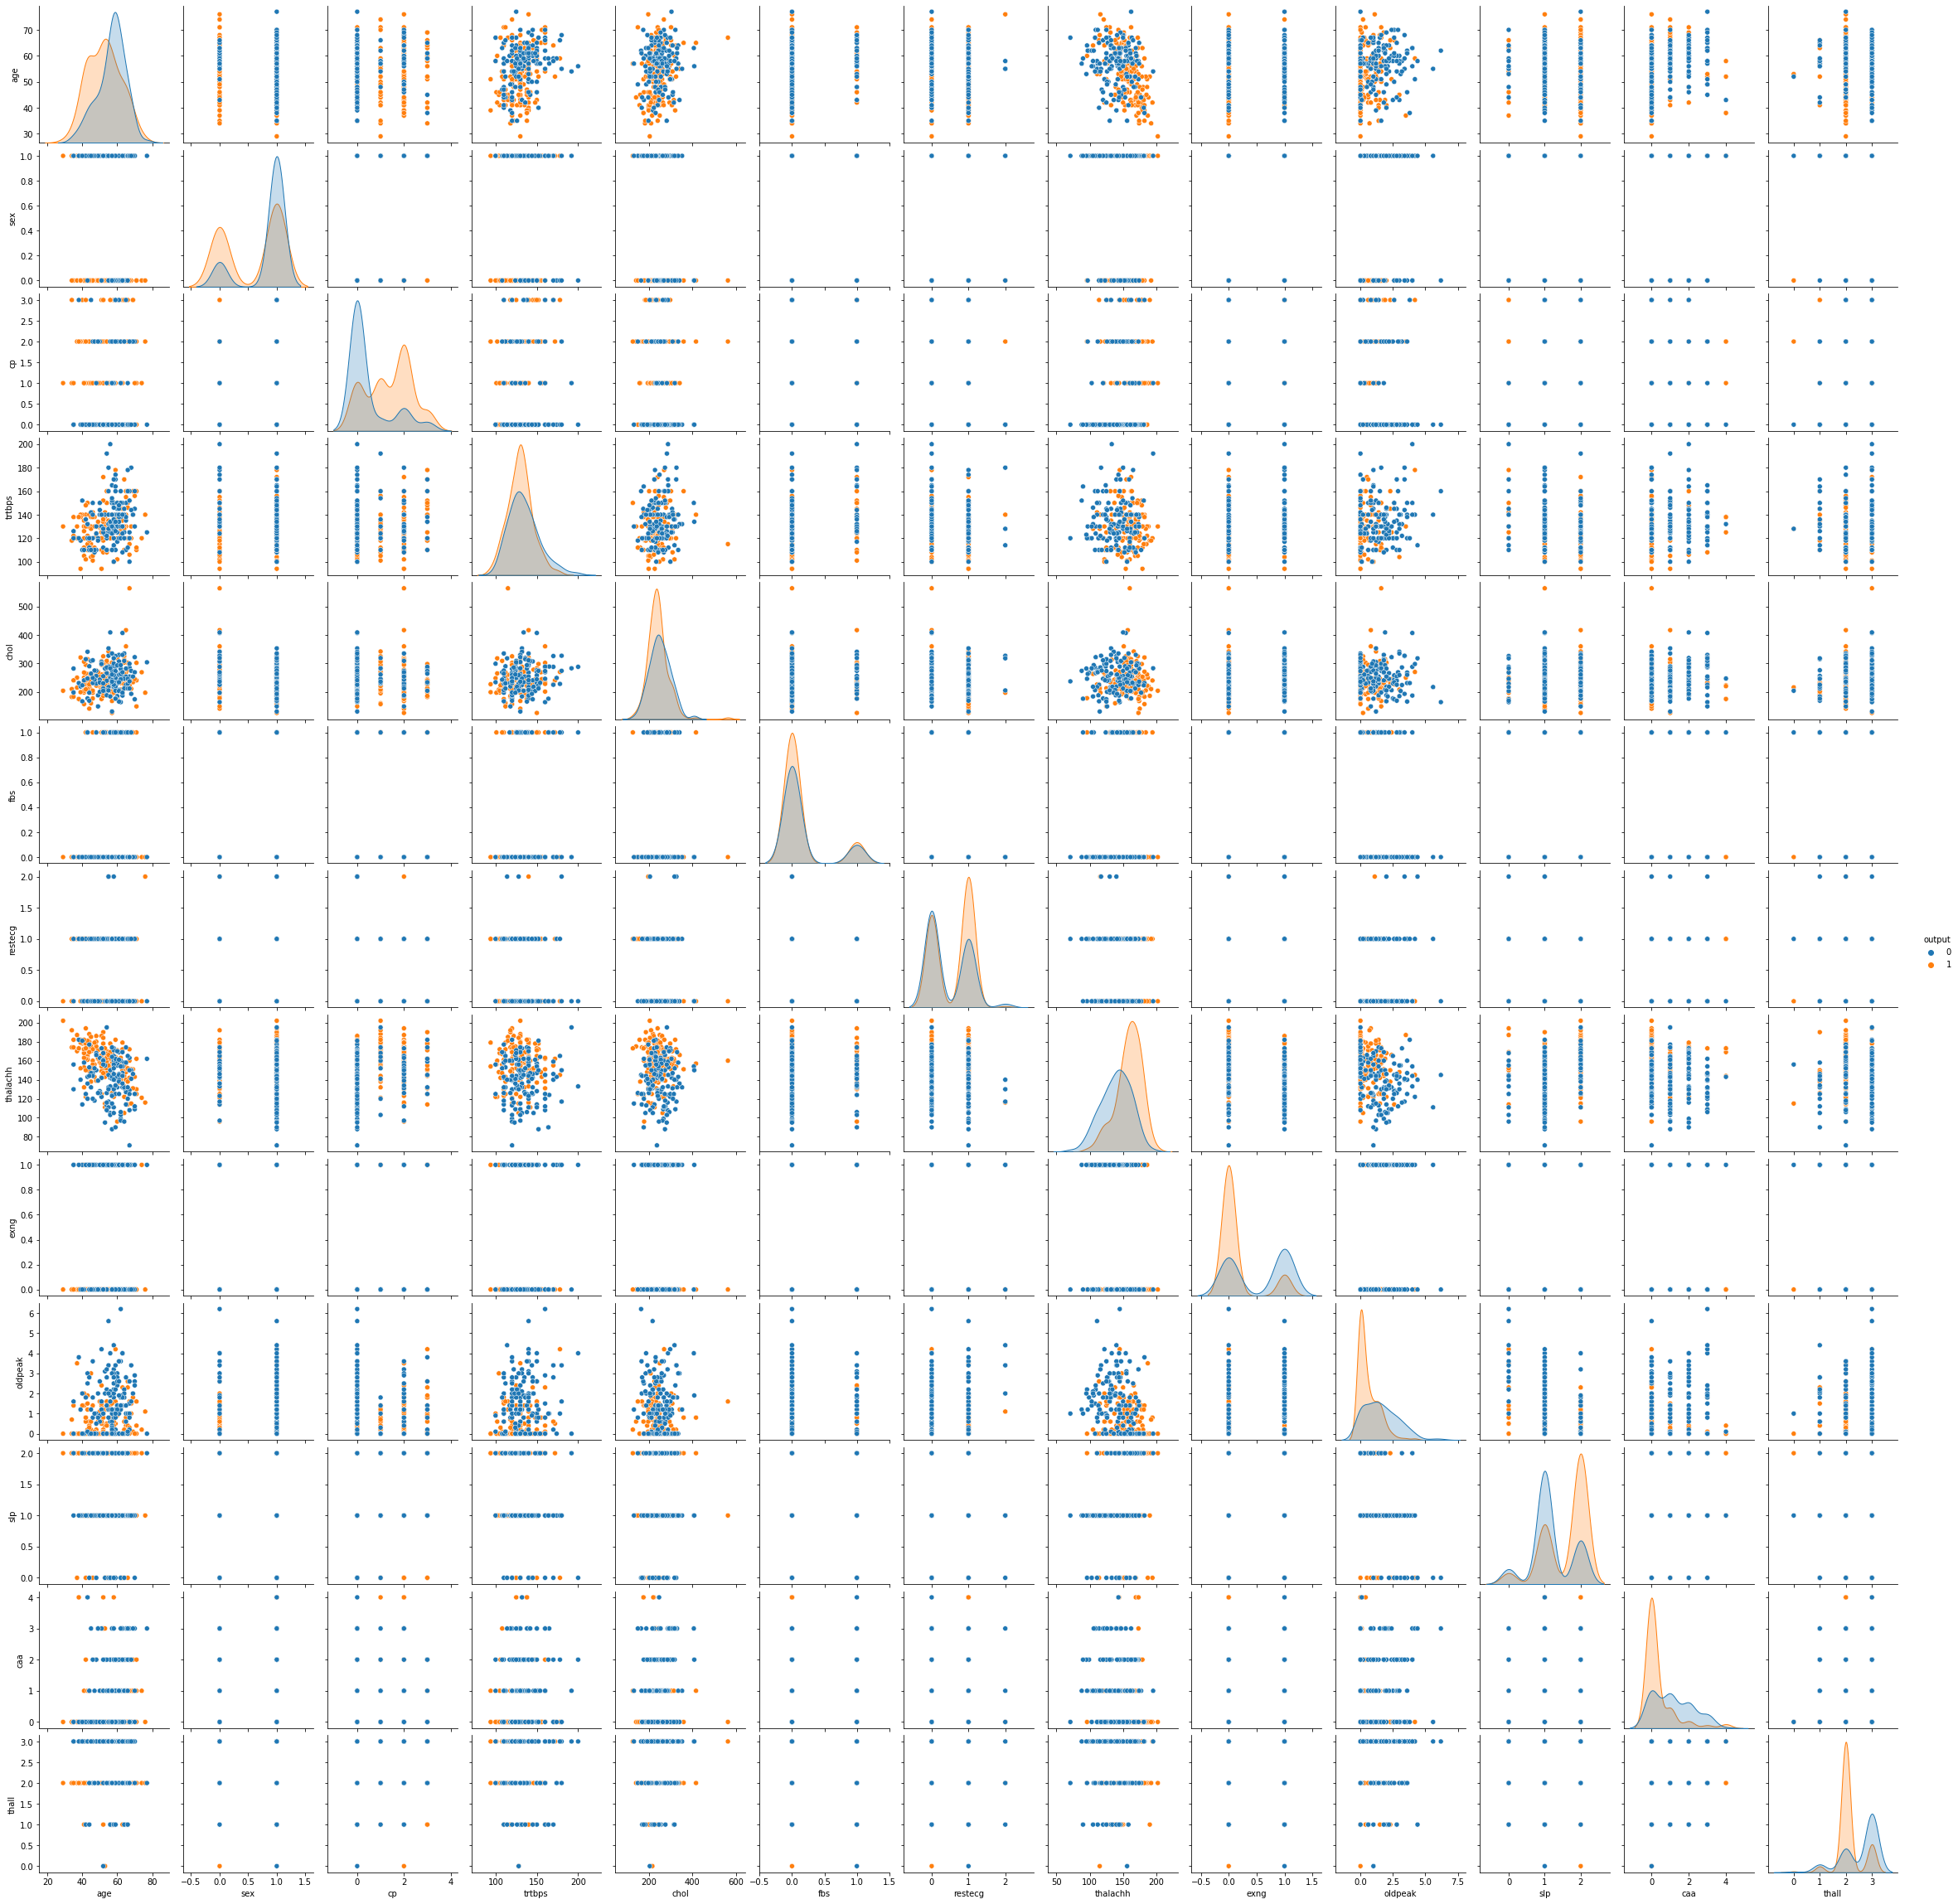

In [18]:
plt.figure(figsize = (35,35))
sns.pairplot(heart_data, vars=["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"], hue='output')

Here we can see that diagonal elements are histrogram of each variable We can see some of them follows normal distribution
and some of them follows normal distribution.
We can see some realtion between variable in scatter plot of diagonals

### You can zoom in by opening above diagram in new tab

# Heatmap

In [19]:
# coefficent of Correaltion makes sence only for numeric variable.
# So We will plot heatmap only for Numeric Variables

In [20]:
#Separating Numeric data 
Numeric = ["age","trtbps","chol","fbs","thalachh","oldpeak"]
heart_data_Numeric = heart_data[Numeric]
heart_data_Numeric.head()

,age,trtbps,chol,fbs,thalachh,oldpeak
0,63,145.0,233.0,1.0,150,2.3
1,37,130.0,250.0,0.0,187,3.5
2,41,130.0,204.0,0.0,172,1.4
3,56,120.0,236.0,0.0,178,0.8
4,57,120.0,240.5,0.0,163,0.6


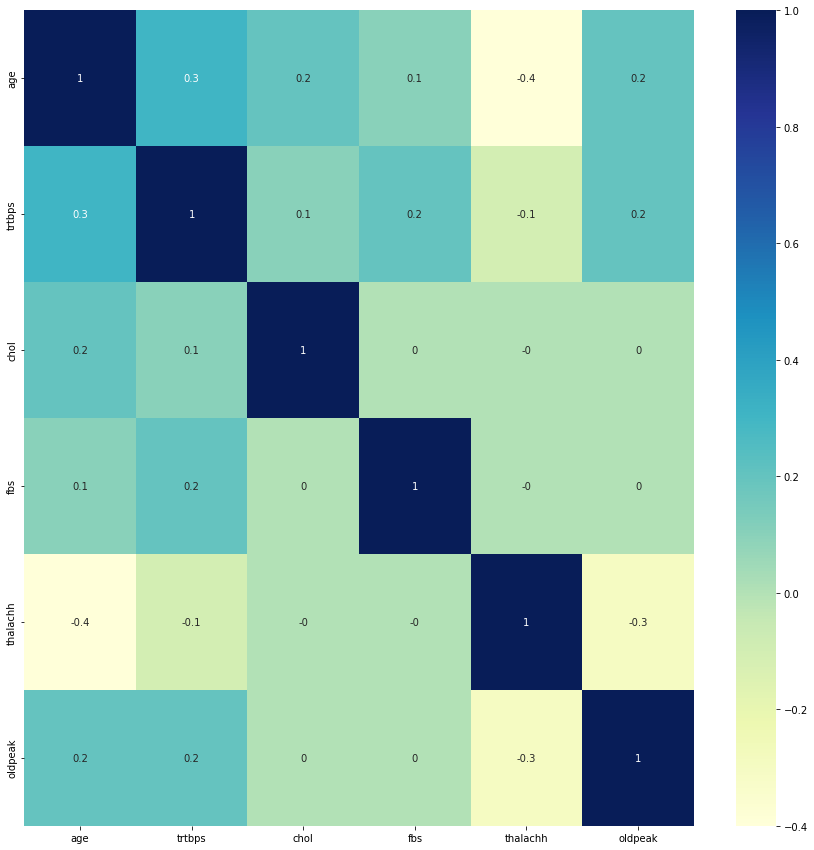

In [21]:
cor = heart_data_Numeric.corr().round(1)
plt.figure(figsize=(15,15))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# At what ages do people get cardiological examinations done?
This can be answer by mean, median and mode.

In [22]:
print("Mean is ",heart_data["age"].mean())
print("Median is ",heart_data["age"].median())
print("Mode is ",heart_data["age"].mode())

Mean is  54.366336633663366
Median is  55.0
Mode is  0    58
Name: age, dtype: int64


# Do men get the examination  more than women?
This question can also be answered by countplot. And below method as well

In [23]:
Nmen = 0 ; Nwomen = 0

for A in heart_data["sex"]:
    if (A == 1):
        Nmen = Nmen + 1
    else:
        Nwomen = Nwomen + 1

print("Number of Men who done the test are ", Nmen)
print("Number of Women who done the test are ", Nwomen)

Number of Men who done the test are  212
Number of Women who done the test are  91


# Does resting blood pressure increase with age?
This can be answered by scatter plot.

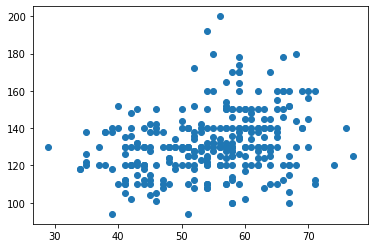

In [24]:
plt.scatter(heart_data["age"], heart_data["trtbps"])
plt.show()

In this graph we can NOT able to see any pattern between age & blood persure. So we can say that age has no association with BP.